 ### Import Packages

In [13]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
pandas.options.display.mpl_style = 'default'

import seaborn as sns

from ipywidgets import interact

### Import Data

In [85]:
def hdma_init():
    institution_data= pandas.read_csv('/home/shubhamjain/devel/contifydeploy/contify-banking/notebooks/data-challenge-data-master/2012_to_2014_institutions_data.csv')
    loans_data= pandas.read_csv('/home/shubhamjain/devel/contifydeploy/contify-banking/notebooks/data-challenge-data-master/2012_to_2014_loans_data.csv')
    merged = pandas.merge(loans_data, institution_data, how='outer', on=['As_of_Year', 'Respondent_ID', 'Agency_Code'])
    return merged

In [86]:
merged = hdma_init()


/home/shubhamjain/.pyenv/versions/banking/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3,4,5,7,8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [89]:
merged.shape

(1339741, 33)

#### Institution Data

In [4]:
institution_data.head()


,As_of_Year,Respondent_ID,Agency_Code,Respondent_Name_TS,Respondent_City_TS,Respondent_State_TS,Respondent_ZIP_Code,Parent_Name_TS,Parent_City_TS,Parent_State_TS,Parent_ZIP_Code,Assets_000_Panel
0,2012,0000000047,1,FIRST FINANCIAL BANK NA,TERRE HAUTE,IN,47802,FIRST FINANCIAL CORPORATION,TERRE HAUTE,IN,47807,2854392
1,2012,0000000056,1,"FIRST FINANCIAL BANK, N.A.",CINCINNATI,OH,45202,NaN,NaN,NaN,NaN,6663427
2,2012,0000000086,1,FIRST NATIONAL BANK OF GERMANT,GERMANTOWN,OH,45327-1349,NaN,NaN,NaN,NaN,52094
3,2012,0000000182,1,EXCHANGE NATIONAL BANK & TRUST,ATCHISON,KS,66002,NaN,NaN,NaN,NaN,330487
4,2012,0000000324,1,FIRST NATIONAL BANK AND TRUST,NEWTOWN,PA,18940,NaN,NaN,NaN,NaN,785017


In [83]:
institution_data.shape

(21655, 12)

#### Loans Data

In [84]:
loans_data.shape


(1321158, 24)

In [82]:
merged.shape


(1339741, 33)

In [6]:
loans_data.describe()

,Agency_Code,As_of_Year,Loan_Amount_000,Sequence_Number,State_Code,Conforming_Limit_000
count,1321158.000000,1321158.000000,1321158.000000,1321158.000000,1321158.000000,1320321.000000
mean,6.852763,2012.797469,290.233111,162353.932230,38.513506,532.910087
std,2.486604,0.775239,965.779154,334661.258178,15.257442,86.907939
min,1.000000,2012.000000,1.000000,0.000000,10.000000,417.000000
25%,7.000000,2012.000000,153.000000,2322.000000,24.000000,458.000000
50%,7.000000,2013.000000,235.000000,16128.000000,51.000000,535.000000
75%,9.000000,2013.000000,347.000000,140628.000000,51.000000,625.000000
max,9.000000,2014.000000,99625.000000,3076577.000000,54.000000,625.000000


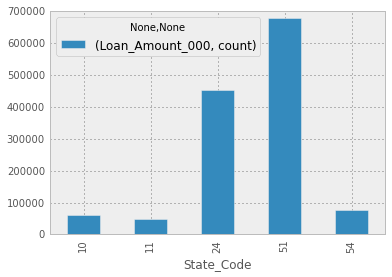

In [55]:
statewize = loans_data[['State_Code', 'Loan_Amount_000']]
statewize_grouped = statewize.groupby('State_Code').agg(['count'])
statewize_grouped.plot(kind='bar')


TypeError: 'AxesSubplot' object is not callable

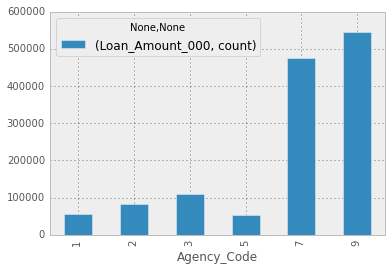

In [8]:
agencywize = loans_data[['Agency_Code', 'Loan_Amount_000']]
agencywize_grouped = agencywize.groupby('Agency_Code').agg(['count'])
agencywize_grouped.plot(kind='bar')


/home/shubhamjain/.pyenv/versions/banking/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xd317c10>],
 'caps': [<matplotlib.lines.Line2D at 0xd31cb50>,
 'fliers': [<matplotlib.lines.Line2D at 0xd320d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd320710>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd317e10>,
  <matplotlib.lines.Line2D at 0xd31c510>]}

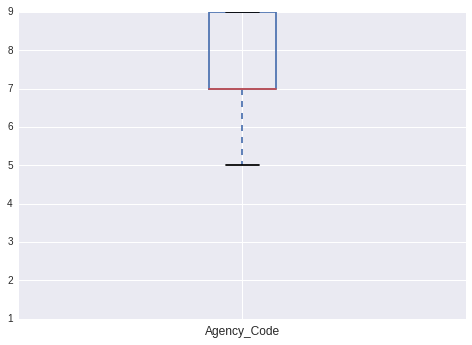

In [23]:
loans_data.boxplot(column='Agency_Code')


TypeError: cannot concatenate 'str' and 'int' objects

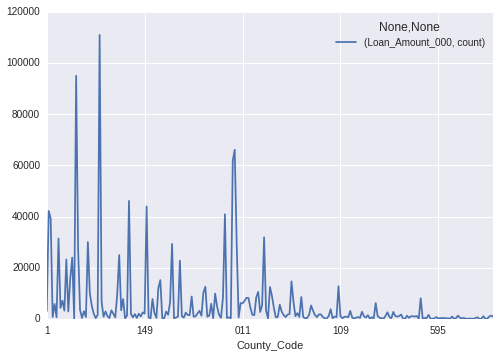

In [15]:
countywize = loans_data[['County_Code', 'Loan_Amount_000']]
countywize_grouped = countywize.groupby('County_Code').agg(['count'])
countywize_grouped.plot()


TypeError: cannot concatenate 'str' and 'int' objects

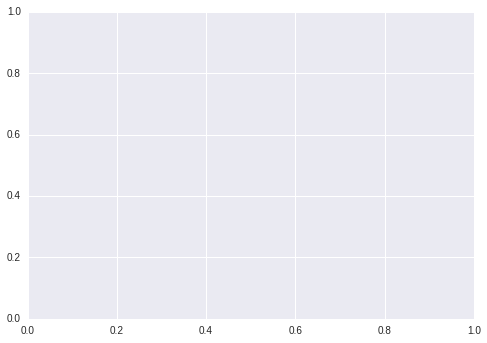

In [16]:
sns.distplot(countywize.dropna(), hist=False, kde=True, rug=False, bins=25);

def sns_compare(year1,year2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    for yr in range(int(year1),int(year2)):
        sns.distplot(lexp[str(yr)].dropna(), hist=False, kde=True, rug=False, bins=25)
sns_compare('2000','2010')


In [ ]:
agencywize = loans_data[['Agency_Code', 'Loan_Amount_000']]
agencywize_grouped = agencywize.groupby('Agency_Code').agg(['count'])
agencywize_grouped.plot(kind='bar')

In [68]:
from StringIO import StringIO

df1 = pandas.read_csv(io.StringIO(u"""Year Week Colour Val1
2014 A Red 50
2014 B Red 60
2014 B Black 70
2014 C Red 10
2014 D Green 20
"""), sep=" ")
df2 = pandas.read_csv(io.StringIO(u"""Year Week Colour Val2
2014 A Black 30
2014 B Black 100
2014 C Green 50
2014 C Red 20
2014 D Red 40
"""), sep=" ")
df3 = pandas.read_csv(io.StringIO(u"""Year Week Colour Val3
2013 B Red 60
2013 C Black 80
2013 B Black 10
2013 D Green 20
2013 D Red 50
"""), sep=" ")

In [72]:
pandas.merge(df1, df2, how='outer', on=['Year', 'Week', 'Colour'])


,Year,Week,Colour,Val1,Val2
0,2014,A,Red,50,NaN
1,2014,B,Red,60,NaN
2,2014,B,Black,70,100
3,2014,C,Red,10,20
4,2014,D,Green,20,NaN
5,2014,A,Black,NaN,30
6,2014,C,Green,NaN,50
7,2014,D,Red,NaN,40


In [ ]:


df2:


df3:
